In [1]:
import pandas as pd
import numpy as np
# 使用accuracy_score作为分类回归模型性能的评价
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#显示中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['axes.unicode_minus'] = False
#读取数据
# csv文件没有列名，增加列名
# 花萼长度、宽度；花瓣长度、宽度
feat_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dpath = "./Data/Test2/"
df = pd.read_csv(dpath + "iris.csv", names = feat_names, header=None)
#通过观察前5行，了解数据每列（特征）的概况
df.head()
#类别
unique_Class = df['Class'].unique()#unique() 统计list中的不同值时,返回的是array.
unique_Class


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [2]:
#只考虑两类分类：setosa vs. non_setosa
target_map = {'Iris-setosa':0, #山鸢尾
'Iris-versicolor':1, #变色鸢尾
'Iris-virginica':1 } #2，弗吉尼亚鸢尾
# Use the pandas apply method to numerically encode our attrition target variable
df['Class'] = df['Class'].apply(lambda x: target_map[x])
#df.head()
#或者pandas自动定义标签转换
#df['Class'] = pd.Categorical(df['Class']).codes
df.head()
print(df.shape[1])
#

5


sepal-length
sepal-length
sepal-length
sepal-width
sepal-width
sepal-width
petal-length
petal-length
petal-length
petal-width
petal-width
petal-width


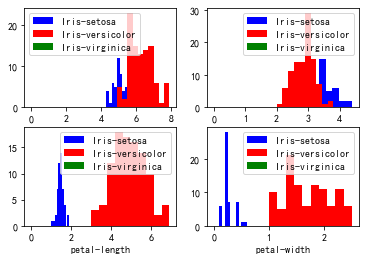

In [3]:
#查看不同类别下特征的直方图，初步了解特征的可分性
#3个类别的颜色
colors = ['blue', 'red', 'green']
# plot histogram
for feature in range(df.shape[1] - 1): # (shape = 150, 5), 5-4 = 4，每维特征
    plt.subplot(2, 2, feature+1) # subplot starts from 1 (not 0)
    for label, color in zip(range(len(unique_Class)), colors): #为每个类别分配颜色
        feat_name = df.columns[feature]
        print(feat_name)
        samples = df[df['Class']==label][feat_name] #该类别的所有样本
        plt.hist(samples,label = unique_Class[label],color=color)
    plt.xlabel(df.columns[feature])
    plt.legend()
plt.show()

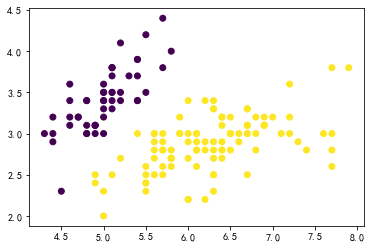

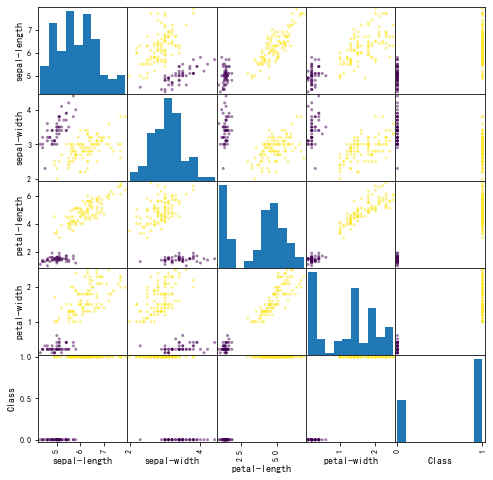

In [4]:
#花萼长度和宽度的散点图
plt.scatter(df['sepal-length'], df['sepal-width'], c=df['Class']);
plt.show()
#每2维特征的散点图
pd.plotting.scatter_matrix(df, c=df['Class'], figsize=(8, 8));
plt.show()

In [5]:
# 从原始数据中分离输入特征x和输出y
y = df['Class']
print(y)
#X = df.drop(['petal-length', 'petal-width', 'Class'], axis = 1)
#X = df[['sepal-length','sepal-length']]
X = df.iloc[:, 0:2] # 只取前两维特征

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Class, Length: 150, dtype: int64


In [6]:
# 特征缩放:数据标准化
from sklearn.preprocessing import StandardScaler
#模型训练
scaler = StandardScaler()
scaler.fit(X)
#特征缩放
X = scaler.transform(X)
#将数据分割训练数据与测试数据
from sklearn.model_selection import train_test_split
# 随机采样20%的数据构建测试样本，其余作为训练样本
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=33, test_size=0.2)
X_train.shape

(120, 2)

No handles with labels found to put in legend.


LogisticRegression(C=100)
100


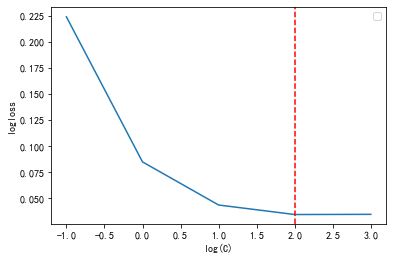

array([7.86351176])

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
#设置超参数搜索范围
Cs = [ 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(C = Cs)
#生成学习器实例
lr = LogisticRegression()
#生成GridSearchCV实例
grid= GridSearchCV(lr, tuned_parameters,cv=10, scoring='neg_log_loss',n_jobs = 4)
#训练，交叉验证对超参数调优
grid.fit(X_train, y_train)
lr_best = grid.best_estimator_
print(lr_best)
test_means = - grid.cv_results_[ 'mean_test_score' ]#mean_test_score平均准确率
n_Cs = len(Cs)
plt.plot(np.log10(Cs), test_means)
#最佳超参数
best_C = grid.best_params_['C']
print(best_C)
plt.axvline(np.log10(best_C), color='r', ls='--')
plt.legend()
plt.xlabel( 'log(C)' )
plt.ylabel( 'logloss' )
plt.show()
lr_best.coef_
lr_best.intercept_

[0 0 0 ... 1 1 1]
(500, 500)
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


<ipython-input-8-cf1b7c1bee9d>:20: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y_test, cmap=cm_light)#与散点图类似


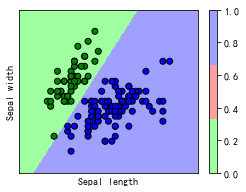

In [8]:
#画分类边界
h = .02 # step size in the mesh
N, M = 500, 500 # 横纵各采样多少个值
x1_min, x2_min = X.min(axis=0) -1
x1_max, x2_max = X.max(axis=0) +1
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2) # 生成网格采样点
X_test = np.stack((x1.flat, x2.flat), axis=1) # 测试点 np.stack()堆叠函数
y_test = lr_best.predict(X_test)
print(y_test)
#y_test = lr_best.predict_proba(X_test) #heatmap?
print(x1.shape)
y_test = y_test.reshape(x1.shape)
print(y_test)
cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.figure(figsize=(4, 3))
#plt.pcolormesh(x1, x2, y_test, cmap=plt.cm.Paired)
plt.pcolormesh(x1, x2, y_test, cmap=cm_light)#与散点图类似
plt.colorbar()
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=cm_dark,marker='o',edgecolors='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
#plt.xlim(xx.min(), xx.max())
#plt.ylim(yy.min(), yy.max())
plt.xticks(()) #横坐标刻度为空
plt.yticks(())#纵坐标刻度为空
plt.show()

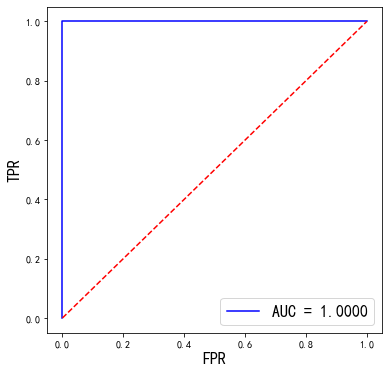

In [9]:
#ROC曲线
from sklearn.metrics import roc_curve, auc
def plot_roc(labels, predict_prob):
    false_positive_rate,true_positive_rate,thresholds=roc_curve(labels, predict_prob)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    #plt.title('ROC')
    plt.plot(false_positive_rate, true_positive_rate,'b',label='AUC = %0.4f'% roc_auc)
    plt.legend(loc='lower right',fontsize = 16)#plt.legend(loc=0)#显示图例的位置，自适应方式
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel('TPR', fontsize = 16)
    plt.xlabel('FPR', fontsize = 16)
scores = lr_best.decision_function(X)
plt.figure(figsize=(6,6))
plot_roc(y, scores)

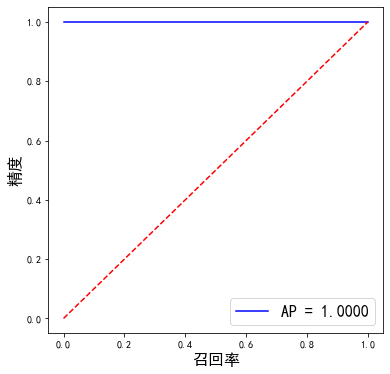

In [10]:
#绘制PR曲线
from sklearn.metrics import precision_recall_curve, average_precision_score
def plot_PR(labels, predict_prob):
    precision,recall,thresholds = precision_recall_curve(labels,predict_prob)
    average_precision = average_precision_score(labels, predict_prob)
    #plt.title('ROC')
    plt.plot(recall, precision,'b',label='AP = %0.4f'% average_precision)
    plt.legend(loc='lower right',fontsize = 16)
    plt.plot([0,1],[0,1],'r--')
    plt.ylabel(u'精度', fontsize = 16)
    plt.xlabel(u'召回率', fontsize = 16)
#scores = lr_best.decision_function(X)
plt.figure(figsize=(6,6))
plot_PR(y, scores)